In [1]:
#import necessary libs
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error,accuracy_score

#for matplotlib backend
%matplotlib nbagg


Sigmoid function is defined as:
$S_{w,b}(x) = \frac{1}{1+e^{-wx+b}}$

Where w,b are parameters and x is input

In [2]:
#sigmoid function
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [3]:
#sigmoid for some 1,0.5,0
sigmoid(1,0.5,0)

0.6224593312018546

## Plot Sigmoid Function

In [4]:
#we will create ipython widgets to better visualize the plot with changing weight and bias
import ipywidgets as widgets
from IPython.display import display

In [5]:
#first lets see python list broadcasting

#x=scalar => y=scalar (scalar i.e. single value)
y_1 = sigmoid(1,0.5,0)

#but what is x were a list 
x = np.linspace(-10,10,100) 
print(type(x))

#then the y returned will also be the list with each index corresponding to output of each x
y = sigmoid(x,0.5,1)
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
plt.suptitle('Visualize Sigmoid')
def update_plot(w,b):
    """
    This function updates the value each time the slider is changed
    """
    #get the output
    y = sigmoid(x,w,b)
    #update the plot
    plt.plot(x,y)
    #show
    plt.show();


#setting up the sliders , params are self explanatory
w = widgets.FloatSlider(min=-10, max=10, value=1, description='w:')
b = widgets.FloatSlider(min=-10, max=10, value=1, description='b:')
    
#hooks up the update function to the widget
widgets.interactive(update_plot, w=w, b=b)

interactive(children=(FloatSlider(value=1.0, description='w:', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

<Figure size 432x288 with 0 Axes>

### Lets try to understand the math behind why the sigmoid behaves the way it does :


$y = \frac{1}{1+e^{-wx+b}}$

Thus if we consider for a particular w and b , consider when $w*x + b =0$ implies $y=0.5$ and $x=-b/w$

Thus for a constant $w$ as $b\rightarrow \infty$ means $x\rightarrow -\infty$.
Hence $y=0.5$ for smaller $x$

and vice versa

## 3D Plot of Sigmoid

### we will conside two dimensional data with features x1 and x2 and weights w1 and w2

$y = \frac{1}{1+e^{-(w1*x1+w2*x2+b)}}$

(10,) (8,)
(8, 10) (8, 10)
[[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]]
[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]


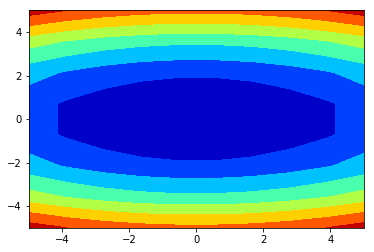

In [7]:
#let us understand how np.meshgrid command works
#during 3rd plots we need to generate z values for a lot of (x,y) pairs 
#meshgrid essentially helps us generate these grid values of (x,y) over some range of x and y

x_mesh = np.linspace(-5,5,10)
y_mesh = np.linspace(-5,5,8)

#we have two vectors defined x and y
print(x_mesh.shape,y_mesh.shape)

#now basically to create a grid what we want is that for every value of x_mesh there are 'y_mesh.shape' number of y values possible
#thus if i write a matrix with x_mesh as in each row , with total rows as y_mesh.shape number of time
#i basically get the x corrdinates of that grid
#same logic for getting y corrdinates

xx_mesh , yy_mesh = np.meshgrid(x_mesh,y_mesh)

print(xx_mesh.shape,yy_mesh.shape)

print(xx_mesh[0:2])
print(x_mesh)

#now i just have to define my function

z_mesh  = xx_mesh**2 + 5*yy_mesh**2 #an ellipse
#will calculate value for each point in the grid

plt.contourf(xx_mesh,yy_mesh,z_mesh,cmap='jet')
plt.show();

In [8]:
#consider
x_mesh = [1,2,3,4]
y_mesh = [1,2,3,4]

#then xx is matrix representing x coordinate of all the blue marked points
##yy is matrix representing y coordinates of all the blue marked points

#note xx stores x coordinates as rows , yy stores y coordinates as columns upto x.shape total columns

xx,yy = np.meshgrid(x_mesh,y_mesh)
print(xx)
print(yy)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]


<img src='mesh.png'> 

In [9]:
def sigmoid_3d(x1,x2,w1,w2,b):
        return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [10]:
#value returned
sigmoid_3d(1,2,3,4,5)

0.9999998874648379

In [11]:
#to plot 3rd plots
from mpl_toolkits import mplot3d

In [12]:
#two features
x1 = np.linspace(-5,5,100)
x2 = np.linspace(-5,5,100)

#make a grid of two vectors (will calculate a y for each permutation of x1 and x2)

xx1,xx2 = np.meshgrid(x1,x2)
print(x1.shape,x2.shape,xx1.shape,xx2.shape)

#for each value of x1 and x2 we want to calculate y

(100,) (100,) (100, 100) (100, 100)


In [13]:
def plot(xx1,xx2,Y,d=180):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(xx1,xx2,Y,cmap='viridis')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.view_init(30,d)
    plt.tight_layout();

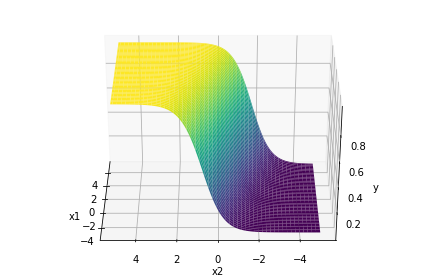

In [14]:
#if one weight is much much larger than other
Y = sigmoid_3d(xx1,xx2,0.5,2,1)
plot(xx1,xx2,Y)

We see that the curve sort of becomes independent of x1 i.e. for each value of x1 the curve remains same which is evident because w2>>>>w1 and hence contribution of feature 1 is almost negligible

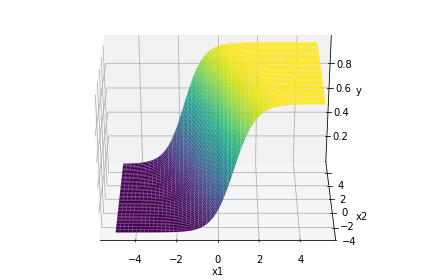

In [15]:
#we can see vice versa also
Y = sigmoid_3d(xx1,xx2,2,0.5,1)
plot(xx1,xx2,Y,270)

In [16]:
plt.suptitle('Visualize Sigmoid 3D')
def update_plot(w1,w2,b):
    """
    This function updates the value each time the slider is changed
    """
    #get the output
    y = sigmoid_3d(xx1,xx2,w1,w2,b)
    #update the plot
    plot(xx1,xx2,y,100)


#setting up the sliders , params are self explanatory
w1 = widgets.FloatSlider(min=-10, max=10, value=1, description='w1:')
w2 = widgets.FloatSlider(min=-10, max=10, value=1, description='w2:')
b = widgets.FloatSlider(min=-10, max=10, value=1, description='b:')
    
#hooks up the update function to the widget
widgets.interactive(update_plot, w1=w1,w2=w2, b=b)

interactive(children=(FloatSlider(value=1.0, description='w1:', max=10.0, min=-10.0), FloatSlider(value=1.0, d…

<Figure size 432x288 with 0 Axes>

In [17]:
#drwaing our contour maps in which z axis is represented as diff color values
import matplotlib.colors

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])

plt.suptitle('Visualize Sigmoid 3D')
def update_plot(w1,w2,b):
    """
    This function updates the value each time the slider is changed
    """
    #get the output
    y = sigmoid_3d(xx1,xx2,w1,w2,b)
    #update the plot
    plt.contourf(xx1,xx2,y,cmap=my_cmap,alpha=0.6)
    plt.show();


#setting up the sliders , params are self explanatory
w1 = widgets.FloatSlider(min=-10, max=10, value=1, description='w1:')
w2 = widgets.FloatSlider(min=-10, max=10, value=1, description='w2:')
b = widgets.FloatSlider(min=-10, max=10, value=1, description='b:')
    
#hooks up the update function to the widget
widgets.interactive(update_plot, w1=w1,w2=w2, b=b)

interactive(children=(FloatSlider(value=1.0, description='w1:', max=10.0, min=-10.0), FloatSlider(value=1.0, d…

<Figure size 432x288 with 0 Axes>

In [18]:
class SigmoidNeuron:
  
      def __init__(self):
        self.w = None
        self.b = None
    
      def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
  
      def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
      def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
  
      def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
  
      def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True,display_loss=False):
    
        # initialise w, b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        
        if display_loss:
            loss = {}
    
        for i in range(epochs):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                #updating weight at each iteraation rather than all at the end
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)   
                
                
            self.w -= learning_rate * dw
            self.b -= learning_rate * db   
            if display_loss:
                y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(y_pred,Y)
            
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.show()
          
       
      def predict(self,X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [19]:
#working on toy data
x = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
y = [1,1,1,0,0,0]

#create an object
model = SigmoidNeuron()
model.fit(x,y,10,0.1)

In [20]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

[[1.07478645 0.09682583]] [-0.00108832]
[[ 1.06383014 -0.33727953]] [-0.02518654]
[[ 1.11744698 -0.39035036]] [-0.085217]
[[ 1.18459813 -0.38231794]] [-0.13720657]
[[ 1.23012839 -0.4183237 ]] [-0.18531627]
[[ 1.28199339 -0.42114308]] [-0.22783211]
[[ 1.3231477  -0.44191199]] [-0.26708503]
[[ 1.36443551 -0.45152109]] [-0.30262848]
[[ 1.40120201 -0.46470961]] [-0.33542427]
[[ 1.43600884 -0.47538595]] [-0.36562409]


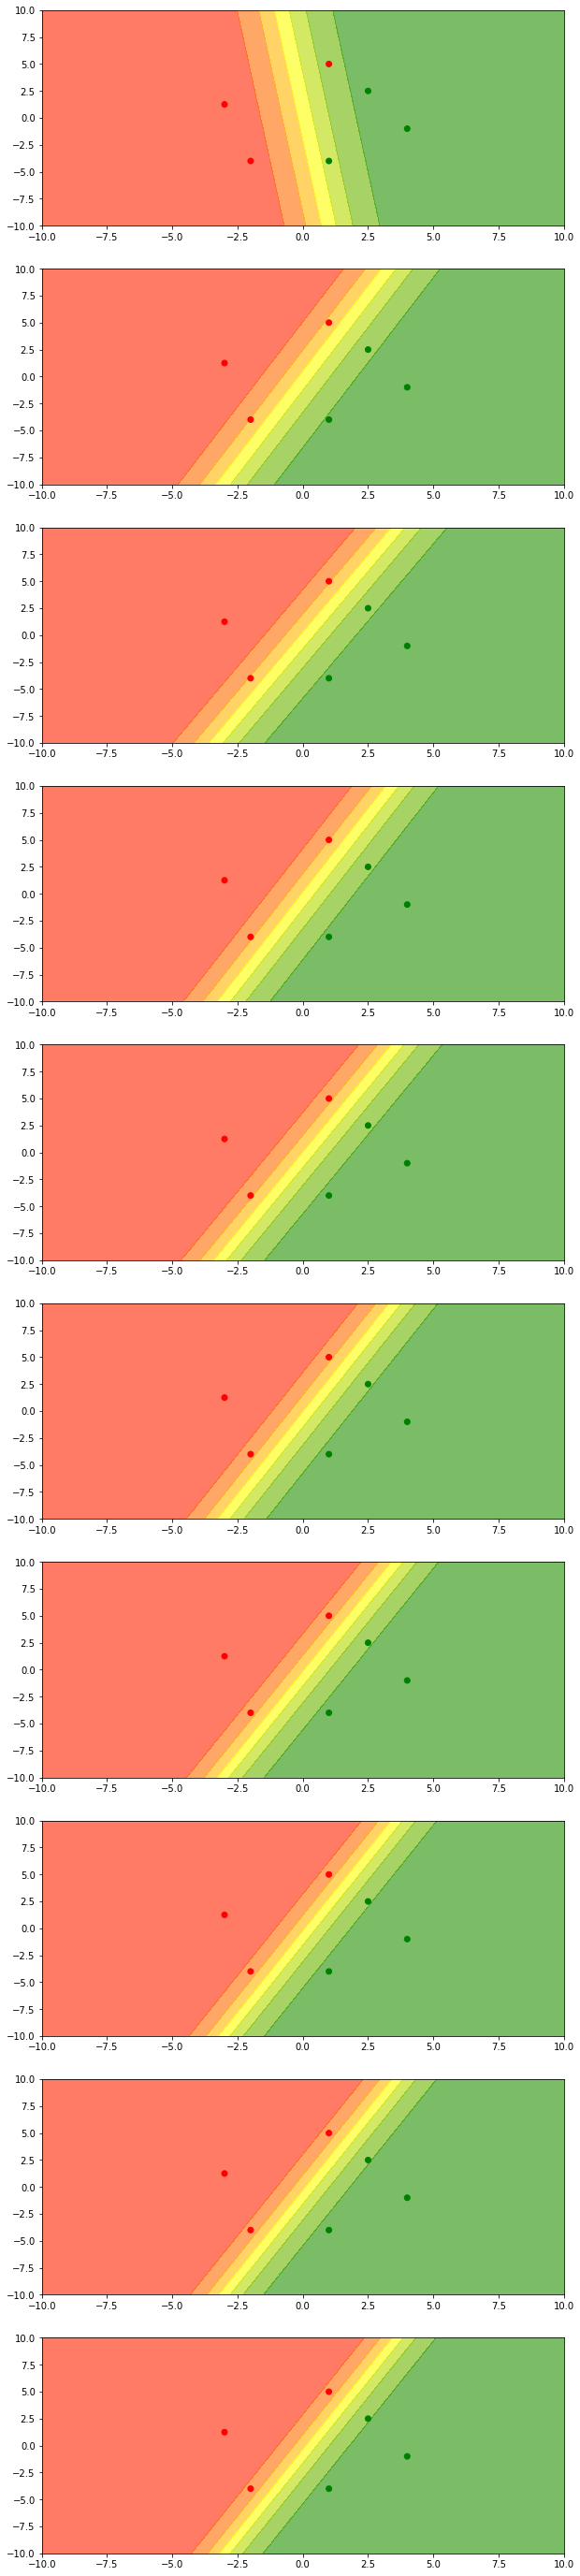

In [21]:
model.fit(x, y, 1, 0.05, True)
N = 10
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(model.w, model.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(x, y, model, ax)
  model.fit(x, y, 1, 0.5, False)

## Application of Sigmoid Neuron

In [22]:
import pandas as pd
#load the data
data = pd.read_csv('mobile.csv')

In [23]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [24]:
X = data.drop('Rating',axis=1)
Y = data['Rating'].values
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [25]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [26]:
data['Class'].value_counts(normalize=True)
Y_bin = data['Class'].values

## Standardisation

In [27]:
#0 mean and std dev = 1 ; so that the algo learns fast

In [28]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [29]:
dist = np.random.random([100,1])

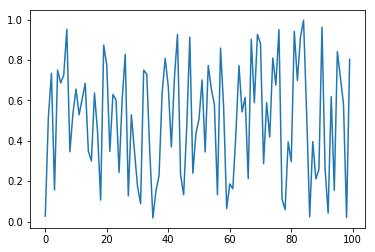

In [30]:
plt.plot(dist);

In [31]:
print(np.mean(dist),np.std(dist))

0.5063954253921452 0.27951374140786733


In [32]:
scaler = StandardScaler()
scaler.fit(dist)
dist_ = scaler.transform(dist)
print(np.mean(dist_),np.std(dist_))

1.865174681370263e-16 1.0


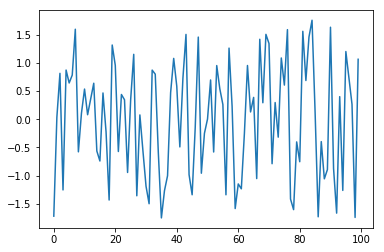

In [33]:
plt.plot(dist_);

In [34]:
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,random_state=0,stratify=Y_bin)

In [35]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

mm_scaler = MinMaxScaler()
Y_scaled_train = mm_scaler.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test = mm_scaler.transform(Y_test.reshape(-1,1))

scaled_threshold = 0.68

Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


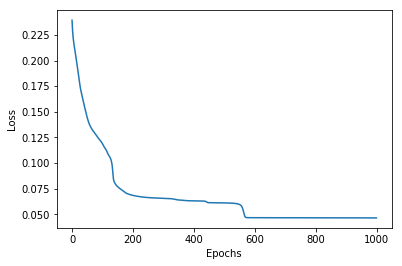

In [36]:
model = SigmoidNeuron()
model.fit(X_scaled_train, Y_scaled_train, epochs=1000, learning_rate=0.015, display_loss=True)

In [37]:
Y_pred_train = model.predict(X_scaled_train)
Y_pred_test = model.predict(X_scaled_test)

In [38]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [39]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [40]:
print(accuracy_train, accuracy_test)

0.7647058823529411 0.7441860465116279
